In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
symptoms_data = pd.read_csv('./data/symtoms_df.csv')
training_data = pd.read_csv('./data/Training.csv')
symptoms_data = symptoms_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
training_data = training_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

C:\Users\Luthfi Hanif\AppData\Local\Temp\ipykernel_21216\163281125.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  symptoms_data = symptoms_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)
C:\Users\Luthfi Hanif\AppData\Local\Temp\ipykernel_21216\163281125.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  training_data = training_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [3]:
symptoms_data.head()

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic_patches
1,1,fungal infection,skin_rash,nodal_skin_eruptions,dischromic_patches,NaN
2,2,fungal infection,itching,nodal_skin_eruptions,dischromic_patches,NaN
3,3,fungal infection,itching,skin_rash,dischromic_patches,NaN
4,4,fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN


In [4]:
print(f"The dataset has {symptoms_data.shape[0]} rows and {symptoms_data.shape[1]} columns.")

The dataset has 4920 rows and 6 columns.


In [5]:
training_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,fungal infection


In [6]:
print(f"The dataset has {training_data.shape[0]} rows and {training_data.shape[1]} columns.")

The dataset has 4920 rows and 133 columns.


In [7]:
label_encoder = LabelEncoder()
training_data['prognosis'] = label_encoder.fit_transform(training_data['prognosis'])

In [8]:
X = training_data.drop(columns=['prognosis'])
y = training_data['prognosis']

In [9]:
X.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y.head()

0    15
1    15
2    15
3    15
4    15
Name: prognosis, dtype: int32

In [11]:
print(y.value_counts())

prognosis
15    120
21    120
23    120
3     120
37    120
10    120
35    120
13    120
18    120
40    120
27    120
25    120
26    120
32    120
5     120
0     120
1     120
39    120
36    120
22    120
20    120
4     120
19    120
17    120
9     120
14    120
34    120
2     120
12    120
16    120
6     120
24    120
31    120
7     120
33    120
29    120
30    120
8     120
11    120
38    120
28    120
Name: count, dtype: int64


In [12]:
# Use oversampling or class weights based on distribution
class_weights = {i: len(y) / (len(np.unique(y)) * count) for i, count in enumerate(y.value_counts())}

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
# Convert to categorical
num_classes = len(np.unique(y))
y_train_cat = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_cat = tf.keras.utils.to_categorical(y_test, num_classes)

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

c:\Users\Luthfi Hanif\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
history = model.fit(X_train, y_train_cat,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    class_weight=class_weights,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)],
                    verbose=1)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3003 - loss: 3.2787 - val_accuracy: 0.9746 - val_loss: 0.9988
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9900 - loss: 0.6418 - val_accuracy: 1.0000 - val_loss: 0.0651
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9991 - loss: 0.0768 - val_accuracy: 1.0000 - val_loss: 0.0196
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9989 - loss: 0.0313 - val_accuracy: 1.0000 - val_loss: 0.0099
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9994 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0127 - val_accuracy: 1.0000 - val_loss: 0.0036
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0108 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0061 - val_accuracy: 1.0000 - val_loss:

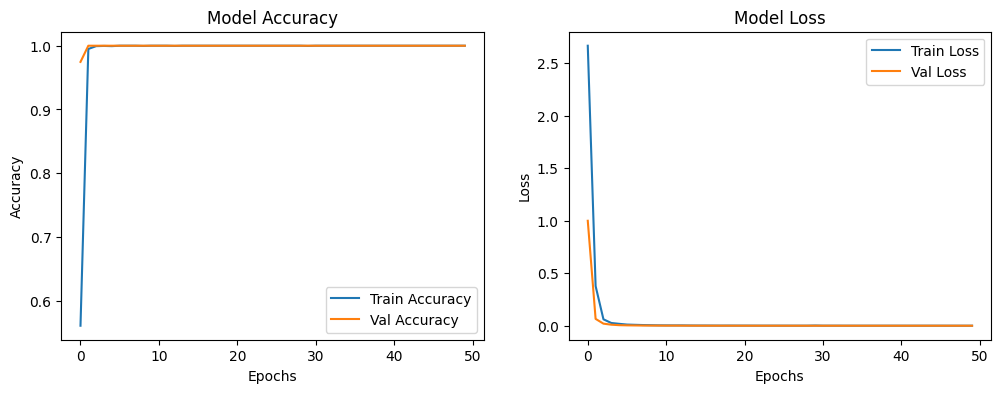

In [17]:
# Visualization
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

In [18]:
# Evaluation
y_pred = np.argmax(model.predict(X_test), axis=1)
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
                                         precision    recall  f1-score   support

(vertigo) paroymsal  positional vertigo       1.00      1.00      1.00        24
                                   acne       1.00      1.00      1.00        24
                                   aids       1.00      1.00      1.00        24
                    alcoholic hepatitis       1.00      1.00      1.00        24
                                allergy       1.00      1.00      1.00        24
                              arthritis       1.00      1.00      1.00        24
                       bronchial asthma       1.00      1.00      1.00        24
                   cervical spondylosis       1.00      1.00      1.00        24
                            chicken pox       1.00      1.00      1.00        24
                    chronic cholestasis       1.00      1.00      1.00        24
                            common cold       1.00      1.00      1.0

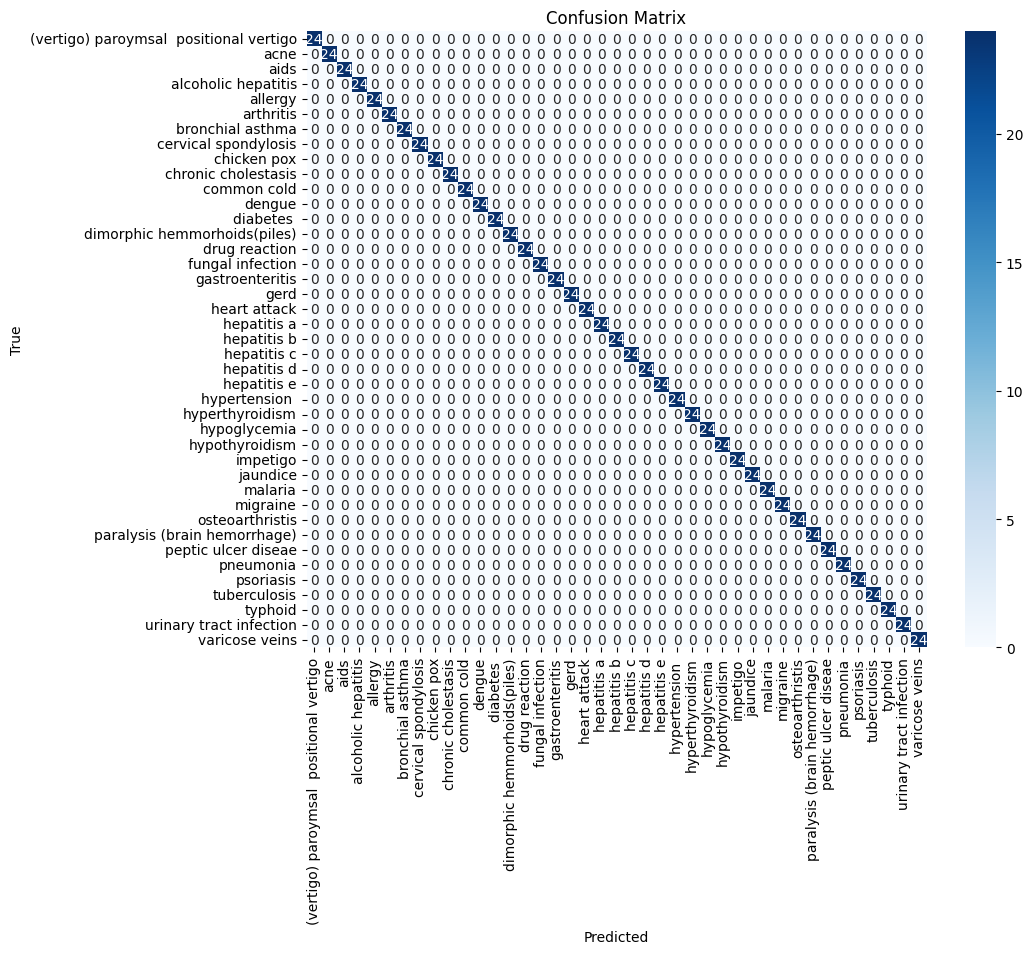

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [20]:
# Prediction Function
def predict_disease(symptoms_input):
    input_data = np.zeros((1, X_train.shape[1]))
    for symptom in symptoms_input:
        if symptom in X.columns:
            input_data[0, X.columns.get_loc(symptom)] = 1
    probabilities = model.predict(input_data)[0]
    predictions = {label_encoder.inverse_transform([i])[0]: prob for i, prob in enumerate(probabilities)}
    sorted_predictions = dict(sorted(predictions.items(), key=lambda item: item[1], reverse=True))
    return sorted_predictions

In [21]:
# Prediction
user_input = ['joint_pain', 'vomiting', 'yellowish_skin', 'dark_urine']
prediction = predict_disease(user_input)
print("Predictions:", prediction)

prediction_output = pd.DataFrame(list(prediction.items()), columns=['Diseases', 'Probability'])
prediction_output

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predictions: {'hepatitis d': 0.9146908, 'heart attack': 0.056195583, 'osteoarthristis': 0.010081552, 'psoriasis': 0.006688811, 'hepatitis a': 0.0054285685, 'dengue': 0.0020770293, 'paralysis (brain hemorrhage)': 0.0011454677, 'gerd': 0.0008806164, 'hepatitis e': 0.00083712063, 'jaundice': 0.0005517064, 'cervical spondylosis': 0.00024195238, 'migraine': 0.00020529142, 'hyperthyroidism': 0.0001511595, 'tuberculosis': 0.00013623342, 'hypoglycemia': 0.00013119768, '(vertigo) paroymsal  positional vertigo': 0.00010720192, 'hepatitis b': 0.00010372793, 'alcoholic hepatitis': 7.321715e-05, 'peptic ulcer diseae': 7.074393e-05, 'arthritis': 5.9570655e-05, 'hypothyroidism': 3.203287e-05, 'diabetes ': 2.9437544e-05, 'hypertension ': 1.4187239e-05, 'drug reaction': 1.0129518e-05, 'pneumonia': 8.29047e-06, 'impetigo': 8.015346e-06, 'dimorphic hemmorhoids(piles)': 7.975528e-06, 'typhoid': 7.3612746e-06, 'varicose veins': 5.8821993e-06, 'gastroenteritis': 4.91936

,Diseases,Probability
0,hepatitis d,9.146908e-01
1,heart attack,5.619558e-02
2,osteoarthristis,1.008155e-02
3,psoriasis,6.688811e-03
4,hepatitis a,5.428568e-03
5,dengue,2.077029e-03
6,paralysis (brain hemorrhage),1.145468e-03
7,gerd,8.806164e-04
8,hepatitis e,8.371206e-04
9,jaundice,5.517064e-04
